# <center> Ансамбли моделей
>**Ансамбль моделей** — это метод, в котором несколько алгоритмов (или вариации одного и того же) обучаются на одних данных, а итоговый прогноз строится на основе всех полученных от моделей прогнозов.  
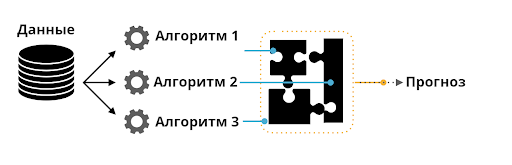

# <center>Бутстреппинг. Бэггинг
В основе бэггинга лежит статистический метод, который называется **бутстрепом (bootstrap)**. Идея бутстрепа заключается в генерации выборок размера n (бутстреп-выборок) из исходного датасета размера N путём случайного выбора элементов с повторениями в каждом из наблюдений.

Пусть у нас есть выборка из 12 клиентов компании: у каждого из них есть свой ID (от 1 до 12) и какие-то характеристики. Мы можем создавать из данной выборки множество различных новых выборок клиентов с новым количеством человек (в данном случае представлены выборки из пяти человек). При этом информацию про одного и того же клиента можно использовать повторно.

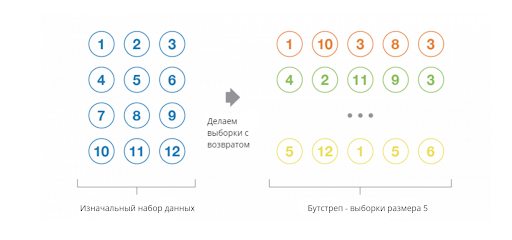

Это намного проще, чем находить новые выборки. По сути, мы собираем данные лишь единожды, а затем на их основе генерируем много выборок для обучения моделей. Это экономит огромные объёмы ресурсов и времени.

При некотором приближении можно считать, что получающиеся выборки являются независимыми и репрезентативными — **это важное допущение**.

Выборки можно назвать **независимыми**, если результаты испытаний и измерения, осуществляемые для одной выборки, никак не влияют на результаты, получаемые на другой выборке.

**Репрезентативность** заключается в соответствии характеристик выборки всей генеральной совокупности.

Бутстреп-выборки часто используются для оценки различных статистических показателей, например разброса или доверительного интервала.

Если вычислять статистические оценки на нескольких независимых выборках, то мы можем, например, оценить их математическое ожидание или разброс. Приведём пример того, как это происходит с точки зрения математики.

Допустим, у нас есть некоторая выборка $x=(5, 1, 3, 6, 4)$, и мы хотим оценить для неё математическое ожидание. Например, это может быть выборка количества товаров, которые приобретали покупатели нашего магазина, и мы хотим найти ожидаемое количество товаров, которое купит случайный клиент.

Конечно, мы без проблем можем его вычислить:

$ E(x) = \frac{5+1+3+6+4}{5} = 3.8 $
Однако это значение лишь на одной выборке, а мы хотели бы вычислить эту статистическую оценку на нескольких выборках и затем проанализировать разброс оценок.

Создаём несколько выборок с помощью бутстрепа и на каждой оцениваем математическое ожидание:  
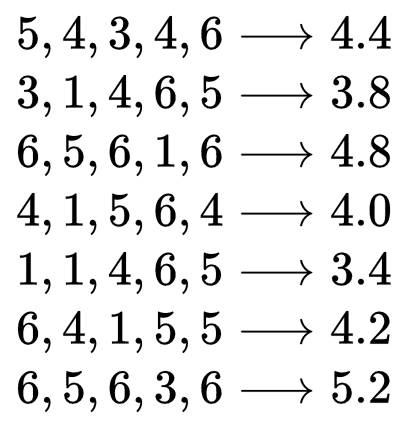

Получили ряд значений: $ 4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2 $. Теперь давайте найдём дисперсию для этого ряда.

In [4]:
import numpy as np

numbers = [4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2]
print('Дисперсия:', round(np.std(numbers)**2, 3))

Дисперсия: 0.317


Таким образом, мы понимаем, что если мы будем создавать различные новые выборки и вычислять для них средние значения, то для полученных значений дисперсия будет равна найденному вами выше значению. Заметьте: **мы узнали это, не собирая никаких новых данных**.

Формализуем только что проделанные действия математически:
1. Генерируем выборки. Необходимо создавать упорядоченные множества элементов, которые мы выбираем с возвратом(возможность брать элементы повторно) из некоторого имеющегося у нас множества:
    $$ \{ X_1, \dots, X_N \} $$
2. Повторяем несколько раз процедуру генерации выборки:
    $$  X^*_b = \Big(X^*_{b1}, \dots, X^*_{bN} \Big), \text{ где } 1 \leq b \leq B $$
3. Считаем интересующую нас статистику по каждой выборке:
    $$ T^*_1 = T(X^*_1), \dots, T^*_B = T(X^*_B) $$
4. Получаем бутстрепную оценку для интересующей нас статистики по этой выборке статистик. Например, для дисперсии она будет вычисляться так:
    $$ \widehat{D}_{boot} = \frac{1}{B} \sum^B_{b=1} T^{*2}_b - \Big(\frac{1}{B}\sum^B_{b=1} T^*_b \Big)^2

# <center>Bias и Variance
Прежде чем перейти непосредственно к ансамблям моделей, нам необходимо повторить *bias-variance decomposition*, или, как его называют по-русски, «разложение ошибки на смещение и разброс». Оно очень полезно для анализа ансамблей моделей.

>**Смещение** — это разница между математическим ожиданием для прогноза и реальным значением:
$$ \text{Bias}[\hat{f}(x)] = E[\hat{f}(x)] - y $$
* $ E[\hat{f}(x)] $ — математическое ожидание для прогноза
* $y$ — реальное значение функции.

>**Смысл смещения** — способность получить лучшую среди всех возможных моделей, то есть максимально точные прогнозы.

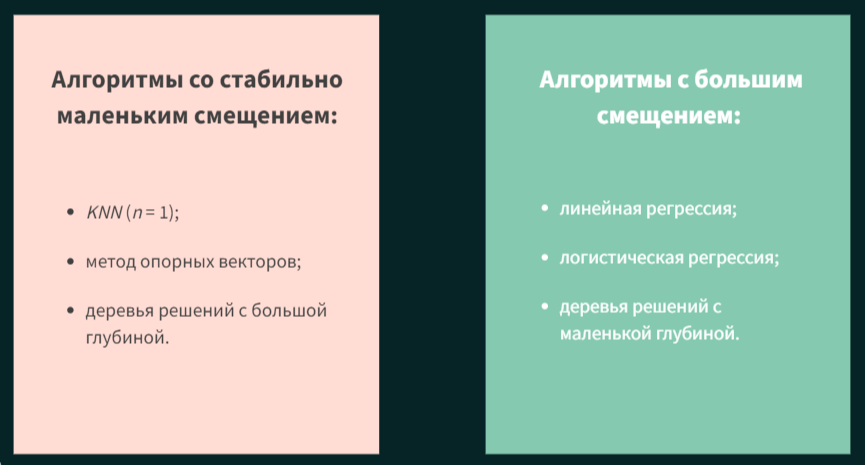

Также значение смещения часто называют **ошибкой смещения** или **ошибкой из-за смещения**.

Если у модели большое смещение, это значит, что ошибка будет достаточно велика из-за слишком сильного упрощения модели.

>**Разброс** — это величина разницы в результатах обучения модели на разных выборках:
$$ \text{Var}[\hat{f}(x)] = E \bigg[ \big( E[\hat{f}(x)] - \hat{f}(x) \big)^2 \bigg] $$
С математической точки зрения разброс модели определяется как математическое ожидание квадрата разницы ожидаемого прогноза и реализованного прогноза модели.

Разброс характеризует устойчивость модели к изменениям в обучающей выборке:

* Если результат сильно зависит от того, какие объекты присутствуют в выборке, разброс будет большим.
* Если алгоритм работает стабильно вне зависимости от особенностей выборки, разброс будет маленьким.

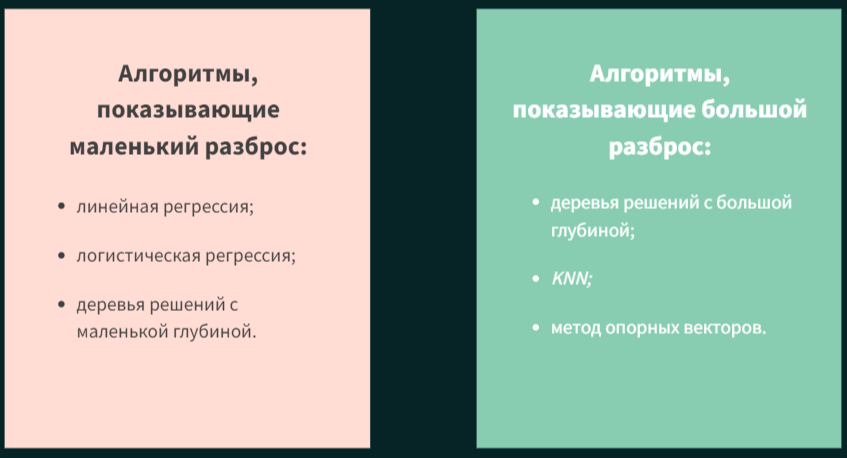

Рассмотрим иллюстрацию того, как сдвиг и разброс влияют на качество предсказания. На рисунке ниже вы видите цель (красный круг), в которую мы хотим попасть.

Есть четыре ситуации:  
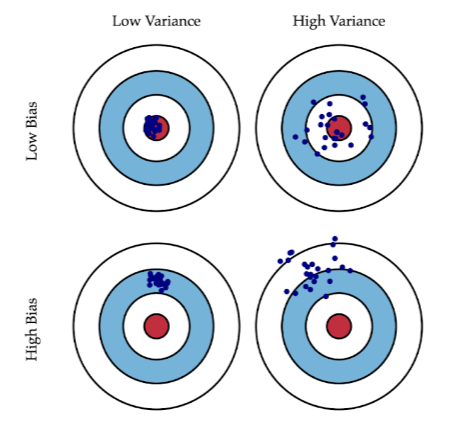

В моделях машинного обучения принцип тот же, только в качестве центра мишени выступает минимально возможная ошибка.

Когда говорят про разложение на *bias* и *variance*, то часто упоминают некую **точку баланса**:
* Если модель очень простая, с маленьким количеством параметров, то, скорее всего, у неё будет очень большое смещение, но маленький разброс.
* Если модель очень сложная, со множеством параметров, у неё будет большой разброс и маленькое смещение.

Схематично эти зависимости можно изобразить следующим образом (это схема не для конкретной модели, а лишь иллюстрация тенденций):

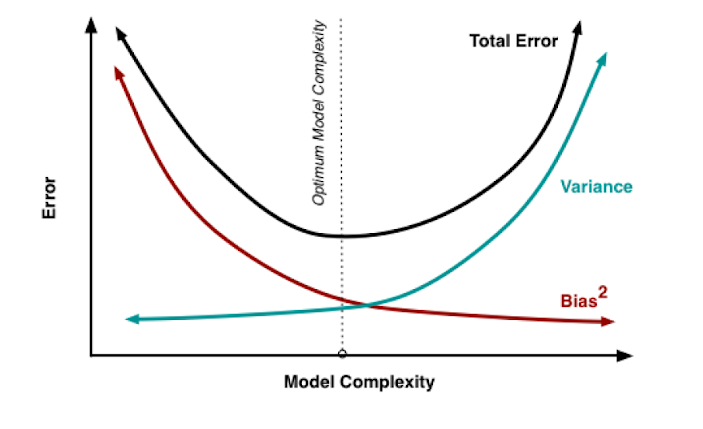

На графике выше по оси абсцисс отложена сложность модели (**Model Complexity**), а по оси ординат — ошибка (**Error**). Также изображены смещение ($\text{Bias}^2$), разброс (**Variance**) и ошибка (**Total Error** — сумма смещения и разброса).

Как вы можете видеть, есть некоторая оптимальная точка, в которой разброс и смещение небольшие, а ошибка минимальна. Именно эта точка нас и интересует.

# <center>Бэггинг
При построении моделей всегда есть вероятность, что при обучении на других данных получились бы другие результаты. Для того чтобы нивелировать такую вероятность, можно использовать бэггинг.

Его идея состоит в том, что мы берём несколько **независимых моделей(моделей, обученных  на независимых выборках)** и усредняем полученные по ним результаты. Таким образом мы получаем модель, имеющую меньший разброс, так как при её построении мы учли несколько моделей.

Как уже было сказано, в реальности получить много независимых выборок слишком сложно, так как найти столько данных обычно невозможно. Поэтому мы используем бутстреп-выборки, о которых говорили в начале юнита.

>Важно отметить, что при бэггинге размер каждой бутстреп-выборки должен совпадать с размером исходной выборки.

Схематично процесс бэггинга можно представить следующим образом:  
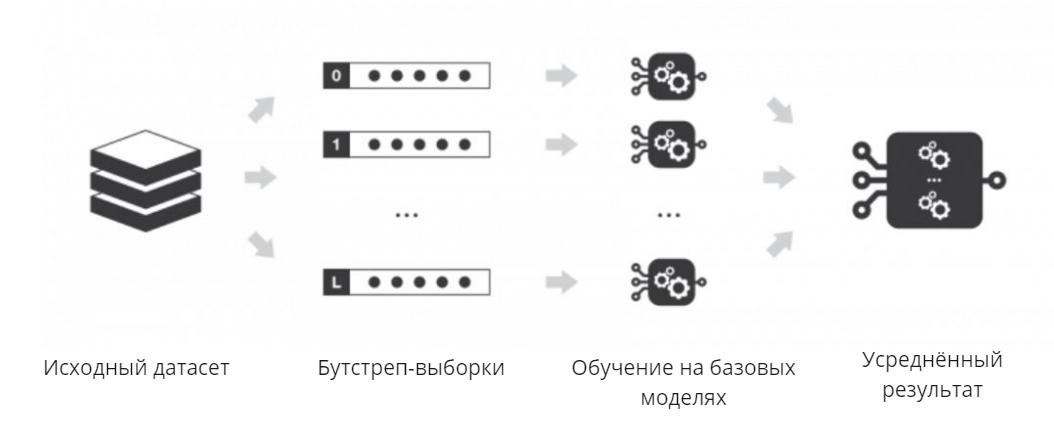

Пусть у нас есть некоторая выборка, и мы с помощью бутстрепа генерируем из неё ещё $B$ выборок:
$$ X_1, \dots, X_B $$
После этого мы определяем много базовых алгоритмов (всего $B$ моделей — по числу выборок) и обучаем каждый базовый алгоритм $a_i(x)$ на своей выборке. После этого получаем итоговый результат:
$$ a(x) = \frac{1}{B} \sum^B_{i=1} a_i(x) $$
* Если мы рассматриваем задачу **классификации**, то, по сути, модели «голосуют» за свой класс.
* Если мы рассматриваем задачу **регрессии**, то результат — просто среднее арифметическое прогнозов по всем моделям.

Получается, что путём усреднения предсказаний линейных регрессий мы смогли уменьшить среднеквадратичную ошибку в $K$ раз (количество независимых моделей).

Однако тут важно отметить, что при решении прикладных задач эффект будет не таким выраженным, так как здесь мы использовали предположение о полной независимости ошибок, а в реальной жизни такое случается редко.

Доказано, что бэггинг **не ухудшает показатель смещения модели**, то есть смещение у ансамбля ровно такое же, как и у одного базового алгоритма.

В общем случае разброс бэггинга будет выражаться следующим образом:
$$ \frac{1}{K} (\text{Var} \space a_n(x)) + \text{Cov}(a_n(x), a_m(x)) $$
В данном выражении через $a_n(x)$ обозначен один из базовых алгоритмов, а за $a_m(x)$ — другой базовый алгоритм.

Из этого следует, что если модели (в данной формуле — базовые модели $a_n(x)$ и $a_m(x)$) независимы, то разброс для ансамбля типа бэггинг будет в $K$ раз меньше, чем разброс у отдельной модели.

**Резюмируем:**
* Бэггинг даёт уменьшение ошибки в $K$ раз по сравнению с одиночной моделью.
* Бэггинг не уменьшает смещение по сравнению с одиночной моделью.
* Бэггинг уменьшает разброс в $K$ раз по сравнению с одиночной моделью.


# <center>Случайный лес
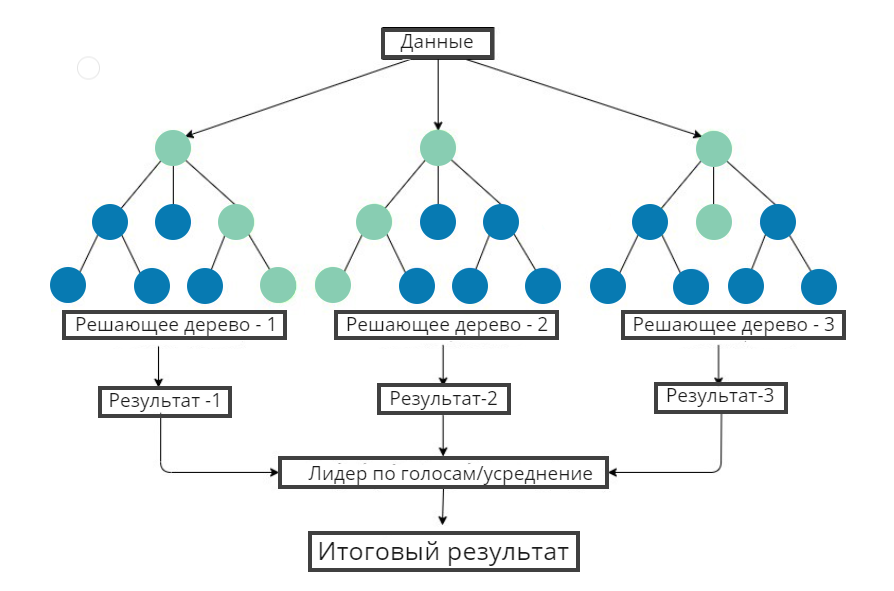

Есть какое-то количество решающих деревьев, каждое из которых мы обучаем на некоторой подвыборке из данных. Получив вердикты от всех моделей, определяем итоговый результат для каждого объекта.

**Для регрессии** правило формирования итогового результата формулируется следующим образом:
$$ f(x) = \frac{1}{K} \sum^K_{i=1} a_i(x) $$
Здесь:
* $K$ — количество моделей,
* $a_i(x)$ — алгоритм решающего дерева,
* $f(x)$ — значение финального предсказания ансамбля.

Это означает, что мы просто находим среднее арифметическое для всех полученных предсказаний.

Правило формирования итогового результата **для классификации**:
$$ f(x) = \argmax_{y \in Y} \sum_{i=1}^K [a_i(x) = y] $$
Здесь деревья просто голосуют за некоторый класс, и объекту присваивается метка класса, за который было отдано наибольшее количество голосов.

Одно из важных понятий, которое здесь появляется, — это **метод случайных подпространств**, который используется для построения ансамблей моделей.

Кратко опишем его принцип:
1. Отбираем обучающую выборку.
2. Определяем число моделей, которые войдут в ансамбль.
3. Для каждой модели берём не все признаки, а только часть из них и формируем выборку с использованием случайно выбранного набора признаков.
4. Объединяем все результаты и определяем итоговое решение по объектам.

Обратите внимание на важную особенность: **здесь выбирается не только обучающая выборка, но ещё и случайная выборка из признаков.**

Алгоритм случайного леса в таком контексте реализуется следующим образом:
1. Для того чтобы построить $i$-е дерево леса, из обучающей выборки $X$ берём случайную подвыборку $X_i$ того же размера, что и вся обучающая выборка.
2. После этого в каждой вершине каждого дерева из $M$ возможных признаков выбираем случайную группу признаков объёма $L$. Для выбранных признаков ищем оптимальное разбиение. Рекомендуется использовать $L=\sqrt{M}$ в задачах классификации и $\frac{M}{3}$ — в задачах регрессии.
3. Для получения предсказания необходимо воспользоваться обычным принципом бэггинга: взять усреднённый ответ в случае регрессии или самый популярный класс — для классификации.

В контексте случайного леса важно обратить внимание на несколько **ключевых аспектов**:
1. Случайный лес может переобучаться, однако это никак не связано с количеством деревьев. Наоборот, с ростом числа деревьев модель становится всё более эффективной в плане корректных прогнозов.
2. >**Ошибка Out-of-Bag** — это способ оценить качество случайного леса.

    Предположим, что в нашем случайном лесу пять решающих деревьев, и наша обучающая выборка выглядит следующим образом:  
    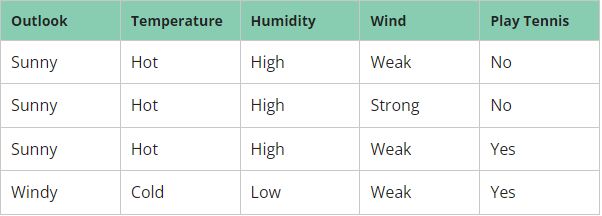

    В выборку внесены погодные условия и итоговое решение — подходит ли день для игры в теннис. Итоговое решение при одинаковых погодных условиях может отличаться, так как на него могли повлиять и другие факторы.  
    Для первого дерева мы делаем такую подвыборку (*Bootstrap Sample*):  
    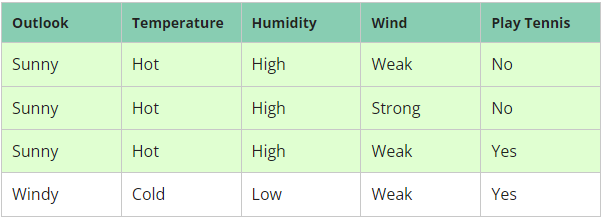

    Тогда неучтённая часть выборки носит название подвыборки Out-of-Bag (*Out-of-Bag Sample*):  
    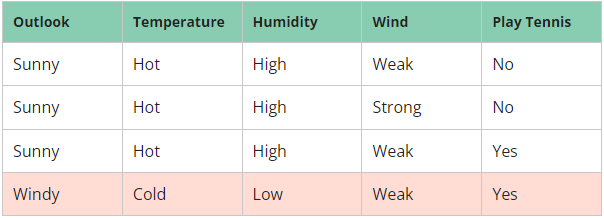

    После того как все деревья будут обучены, эта подвыборка будет передана всем деревьям, для которых она не входила в бутстреп-выборку, для формирования прогноза. Допустим, это были деревья под номерами 1, 3 и 5:  
    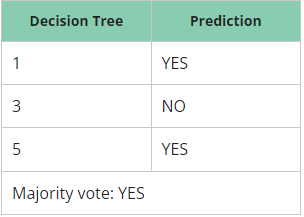

    Мы видим, что большинство деревьев проголосовало, что день подходит для игры в теннис, то есть окончательный прогноз для этого объекта — *YES*. Это совпадает с реальной меткой. Значит, на этом наблюдении алгоритм дал верный прогноз.

    Таким же образом все объекты изначальной выборки проходят через все деревья, в подвыборку которых они не попали, и для каждого объекта осуществляется предсказание.

    Интересно, что можно доказать, что такие объекты составляют примерно 36.8 % от объёма подвыборки, то есть каждое дерево обучается на подвыборке, в которой в среднем 63.2 % уникальных наблюдений.

    **Out-of-Bag-оценка** — это как раз усреднённая оценка базовых алгоритмов на этих ~37% данных, на которых они не обучались.

    Итак, для того чтобы найти out-of-Bag-оценку:

    1. Для каждого объекта $x_i$ получаем предсказания всех деревьев $a_b$, обучавшихся на бутстреп-выборках $X_b$, не содержащих $x_i$.
    2. Усредняем эти предсказания.
    3. Находим значение ошибки для усреднённого предсказания.
    4. Усредняем значение функционала ошибки для всех объектов выборки. Строго математически это можно записать следующим образом:
    $$ \text{OOB} = \frac{1}{N} \sum^N_{i=1} L \Big(y_i, \frac{1}{\sum^B_{b=1}[x_i \notin X_b]}\sum^B_{b=1}[x_i \notin X_b]a_b(x_i) \Big) $$

3. Значимость признаков

    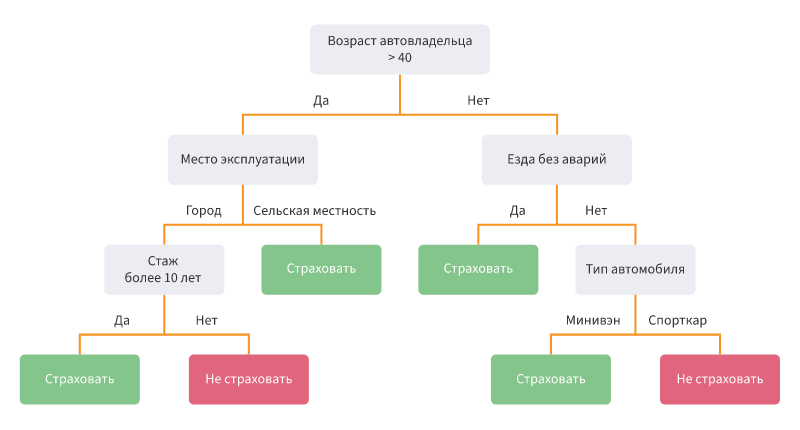  
    В случайном лесе мы строим много деревьев, и чем в среднем выше какой-то признак находится в деревьях, тем он важнее.

|Плюсы случайного леса|Минусы случайного леса|
|-|-|
|Очень высокая точность предсказания (это один из самых эффективных алгоритмов).|Плохо работает с разрежёнными признаками (т. е. с такими, у которых преимущественно нулевые значения). Это может сказываться, к примеру, на качестве анализа текстов.|
|Данные не обязательно масштабировать: случайный лес не чувствителен к масштабированию и в принципе к любым монотонным преобразованиям, поэтому в таких манипуляциях нет смысла.|Сложно интерпретировать результаты.|
|Нет чувствительности к выбросам из-за формирования случайных выборок.||
|Не требуется тщательно настраивать множество параметров. Даже если реализовывать алгоритм с настройками по умолчанию, результат будет лучше, чем у большинства других моделей.||
|Нет склонности к переобучению.||
|Позволяет оценить значимость отдельных признаков.||
|Может эффективно работать с несбалансированными классами.||
|Показывает высокую точность на данных с большим количеством пропусков.||

# <center>Бустинг

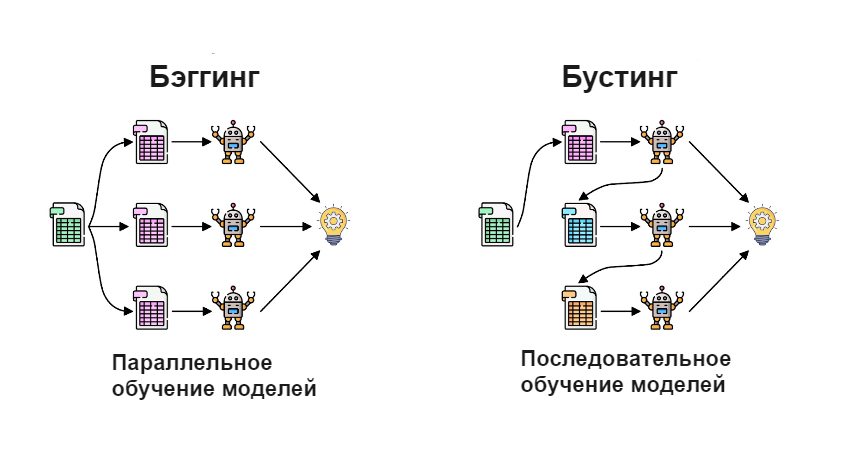

## <center>AdaBoost (Adaptive Boosting)

>**Бустинг** позволяет из большого количества относительно слабых и простых моделей получить одну сильную. В нашем случае будут рассматриваться деревья решений ограниченной глубины (всего из одного уровня) — их ещё называют **пнями**.

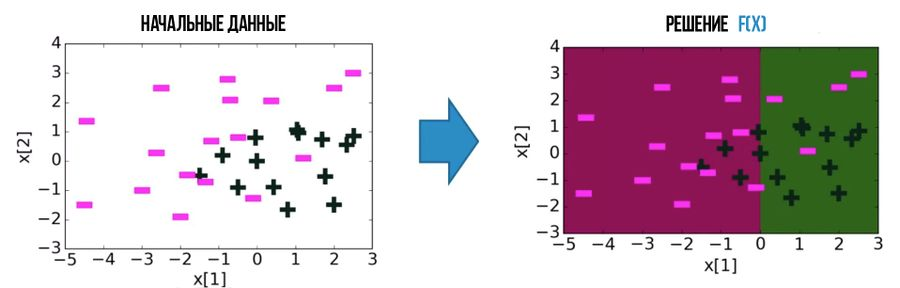

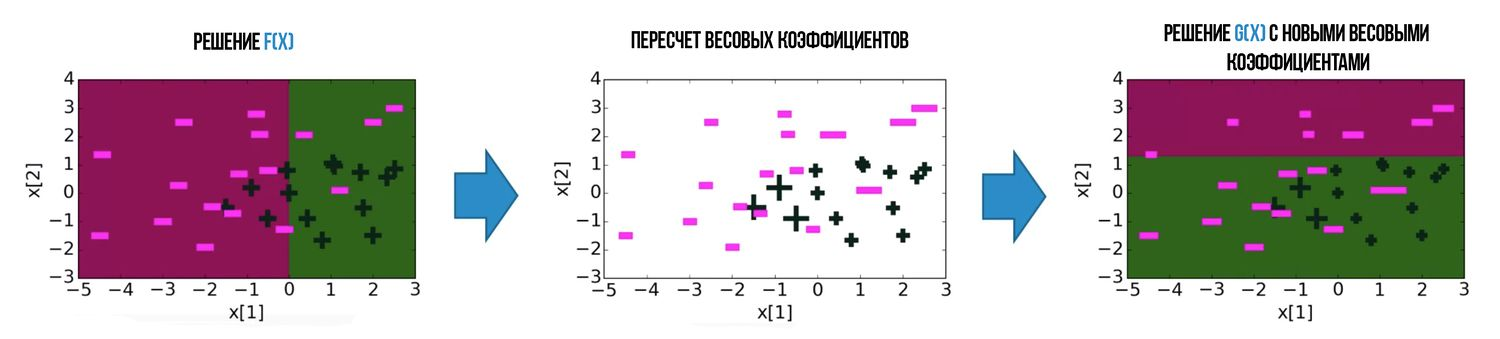

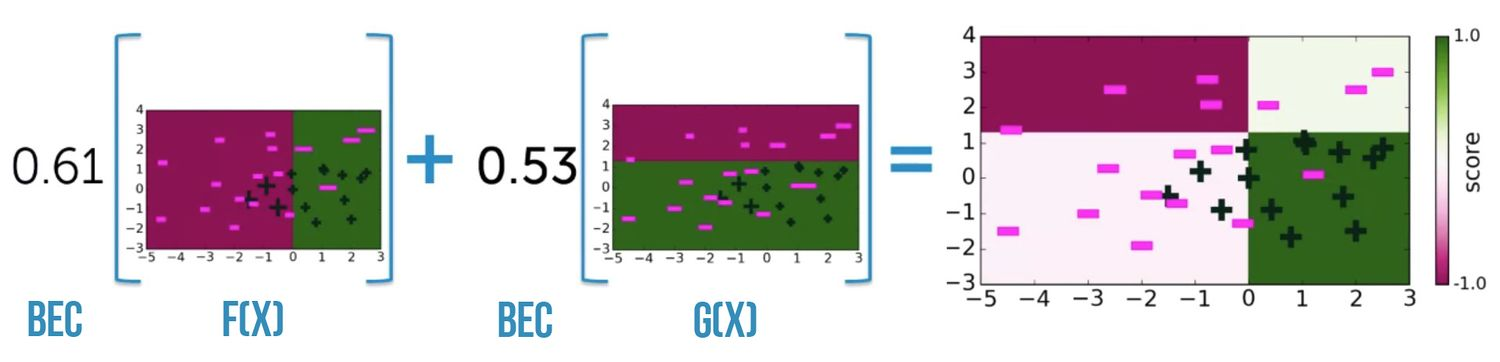

Здесь $f(x)$ и $g(x)$ — результаты применения алгоритмов классификации.

То, что находится в цветной зоне, мы уже с достаточно высокой точностью можем отнести к верному классу. Однако нам необходимо повторять подключение новых моделей, чтобы классифицировать остальные объекты.

Добавляя новые пни, мы в итоге можем добиться достаточно качественного разбиения спустя 30 итераций:

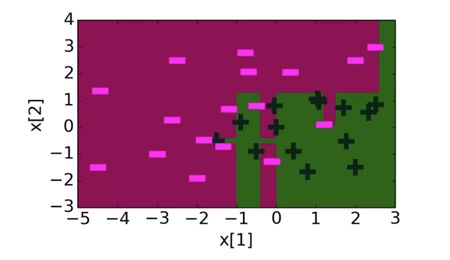

**Алгоритм *AdaBoost*:**
1. Инициализируем веса объектов:
    $$ w_j = \frac{1}{N}, j=1,2,\dots,N $$
2. Для всех $i$ от $1$ до $K$ (если у нас $K$ базовых моделей):
    
    2.1. Строим классификатор $a_i(x)$, используя веса $w_j$.  
    2.2. Вычисляем ошибку:
    $$ \text{err}_i = \sum^N_{j=1} w_j [y_j \neq a_i(x_j)] $$
    2.3. Вычисляем вес нового алгоритма:
    $$ c_i = \frac{1}{2}\ln \frac{1-\text{err}_i}{\text{err}_i} $$
    2.4. Получаем новые веса объектов (классы определяются как -1 и +1):
    $$ w_j \leftarrow w_j \cdot \exp(c_j [y_j \neq a_i(x_j)]), j=1, \dots, N $$
    2.5. Нормируем веса объектов:
    $$ w_j \leftarrow \frac{w_j}{\sum^N_{j=1}w_j} $$
3. Группируем полученные модели:
    $$ f_K(x) = \text{sign} \Bigg[\sum^K_{i=1}c_ia_i(x) \Bigg] $$

>$\text{sign}$— это функция знака, которая извлекает знак действительного числа. Определяется следующим образом:
$$ \text{sign}(x) = \begin{cases} 1, & x>0 \\ 0, & x=0 \\ -1, & x<0 \end{cases} $$

# <center>Градиентный бустинг

Принцип его работы аналогичен AdaBoost: следующие модели улучшают композицию построенных ранее.

Пусть у нас есть некоторая функция потерь $L(y, \hat{y})$. Она зависит от двух аргументов: $y$  — истинный ответ, $\hat{y}$  — прогноз модели. 

Пусть к некоторому моменту обучены $K-1$ алгоритмов $a_1(x), \dots, a_{K-1}(x)$, то есть композиция имеет вид:
$$ f_{K-1}(x) = \sum^{K-1}_{i=1}a_i(x) $$
Теперь добавляем в композицию ещё один алгоритм — $a_K(x)$. Этот алгоритм обучается так, чтобы как можно сильнее уменьшить ошибку композиции на обучающей выборке:
$$ \sum^N_{j=1} L(y_j, f_{K-1}(x_j) + a_k(x_j)) \to \min_{a_k} $$
Для того чтобы найти $a_k$, минимизирующее функционал, задачу разбивают на **две подзадачи**:
1. На первом этапе определяем, какие значения $s_1, \dots, s_N$ должен принимать алгоритм $a_K(x_j) = s_j$, чтобы на объектах обучающей выборки ошибка была минимальной. Формально это можно представить так:
    $$ F(s) = \sum^N_{j=1}L(y_j, a_{K-1}(x_j) + s_j) \to \min_s $$
    где $s=(s_1, \dots, s_n)$  
    Иными словами, необходимо найти такой вектор сдвигов $s$, который будет минимизировать функцию $F(s)$.
    
    Направление наискорейшего убывания функции — это **антиградиент**, так что берём его в качестве вектора $s$:
    $$ s = - \nabla F = \begin{bmatrix}
    -L'_{\hat{y}}(y_1, a_{K-1}(x_1)) \\
    -L'_{\hat{y}}(y_2, a_{K-1}(x_2)) \\
    \vdots \\
    -L'_{\hat{y}}(y_N, a_{K-1}(x_N)) \\
    \end{bmatrix} $$
    Компоненты данного вектора — это те значения, которые должен принимать алгоритм $a_K(x)$ на объектах обучающей выборки, чтобы итоговая ошибка композиции была как можно меньше.

2. Второй этап — построение такого алгоритма $a_K(x)$. По сути, задача построения алгоритма $a_K(x)$ — это обычная задача регрессии на размеченных данных. В данном случае у нас есть обучающая выборка $(x_j, s_j)^N_{j=1}$ — нам просто нужно предсказать значения вектора $s$. Например, используем квадратичную функцию потерь:
    $$ a_K(x) = \argmin_a \frac{1}{N}\sum^N_{j=1}(a(x_j) - s_j)^2 $$

**Последовательность шагов реализации алгоритма**, которую можно запрограммировать:

1. Инициализируем композицию **GBM (Gradient Boosting Machine)** — $f(x)=a_0(x)$, то есть добавляем первый базовый алгоритм. Например, можно использовать:
    * алгоритм $a_0(x)=0$, который всегда возвращает 0 (в задаче регрессии);
    * более сложный алгоритм $a_0(x)=\frac{1}{N}\sum^N_{j=1}y_i$, который возвращает средний истинный ответ по всем элементам обучающей выборки (в задаче регрессии);
    * алгоритм $a_0(x) = \argmax_{y \in Y} \sum_{j=1}^N [y_i=y]$, который всегда возвращает метку самого распространённого класса в обучающей выборке (в задаче классификации).
2. Итеративно повторяем следующие три шага:

    2.1. Вычисляем вектор сдвига:
    $$ s = - \nabla F = \begin{bmatrix}
    -L'_{\hat{y}}(y_1, a_{K-1}(x_1)) \\
    -L'_{\hat{y}}(y_2, a_{K-1}(x_2)) \\
    \vdots \\
    -L'_{\hat{y}}(y_N, a_{K-1}(x_N)) \\
    \end{bmatrix} $$
    2.2. Строим очередной базовый алгоритм $a_K(x)$, который предсказывает вектор-сдвиг:
    $$ a_K(x) = \argmin_a \frac{1}{N}\sum^N_{j=1}(a(x_j) - s_j)^2 $$
    2.3. Добавляем $a_K(x)$ в композицию:
    $$ a_K(x) = \sum^K_{i=1}a_i(x) $$
3. Если выполнен критерий остановки, останавливаем итеративный процесс.

### **XGBoost**
>**XGBoost** — одна из самых эффективных реализаций алгоритма *Gradient Boosted Trees*. Название *XGBoost* расшифровывается  как e**X**treme **G**radient **Boost**ing. *XGBoost* — это улучшение *GBM* через системную оптимизацию и усовершенствование алгоритма.

У XGBoost есть ряд существенных улучшений по сравнению с классической реализацией градиентного бустинга:  
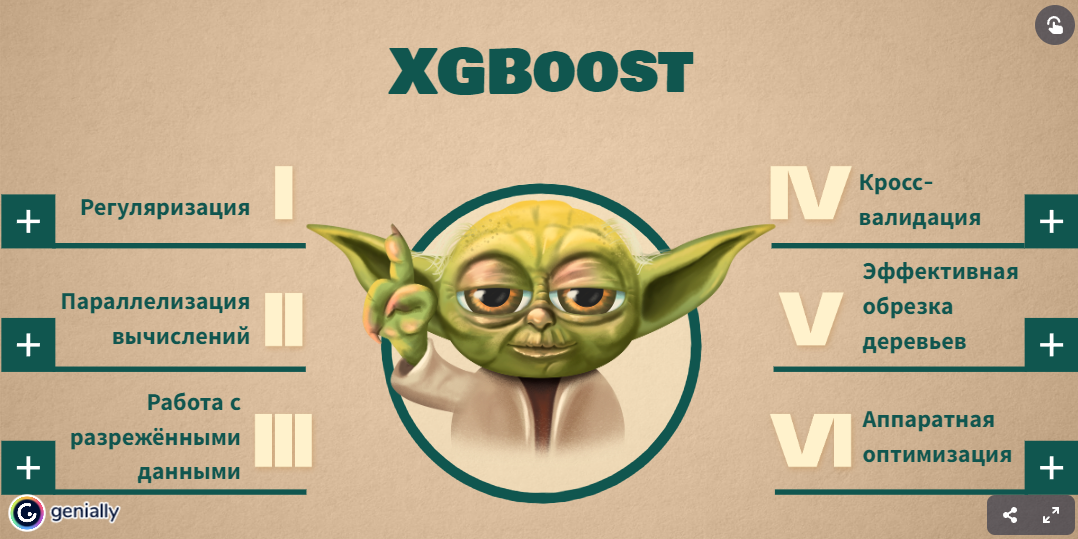
### **CatBoost**
>**CatBoost** — это библиотека градиентного бустинга, созданная Яндексом. Её особенность заключается в том, что в ней используются так называемые **небрежные (oblivious) деревья решений**, чтобы «вырастить» сбалансированное дерево.

>Небрежные деревья — это такие деревья, в которых одни и те же функции используются для левого и правого разбиения на одном уровне дерева:  
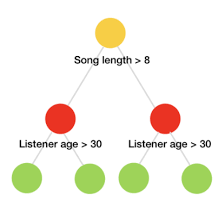

Одно из **главных преимуществ** *CatBoost* заключается в том, что его можно использовать для данных, где категориальные признаки заранее не были преобразованы.

Итак, мы разобрались с очень важным видом ансамблей — бустингом и рассмотрели несколько его моделей:

* ***AdaBoost*** — самый простой вариант бустинга;
* ***GBM*** — классический градиентный бустинг;
* ***XGBoost*** — улучшенная версия градиентного бустинга;
* ***CatBoost*** — улучшенная версия градиентного бустинга, адаптированная для работы с категориальными переменными.
